# -----PSEU PANEL 5------

# Load libraries

In [ ]:
import glob as glob
import pandas as pd
from upsetplot import generate_counts
from upsetplot import from_contents
from upsetplot import UpSet
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyranges as pr
from itertools import combinations
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy import stats
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

# Set seaborn plotting theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

colors_input = {
  "RNA004_HEK293T_A" : "#EE6C4D",
  "RNA004_HEK293T_B" : "#E69581",
  "RNA004_blood_1" :"#0B3954",
  "RNA004_blood_IVT_1" :"#8b5cf6",
  "RNA004_UHRR_1" : "#098C9A",
  "RNA004_UHRR_2" : "#26AFBE",
  "RNA004_UHRR_3" : "#93C6CC", 
  "RNA004_blood_2" : "#177BB5",
  "RNA004_blood_3" : "#38A6E5",
  "RNA004_blood_IVT_3" : "#BA9EFA",
}

# LOAD PSEU SITES FROM MODKIT

## BLOOD

In [ ]:
blood_RNA004_pseu = glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*blood*pse*") + glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*S*DRS*pse*")
new_blood_RNA004_pseu = "/home/awiercze/RNA004_S5_DRS_basecall.0.7.2.GRCh38_pse*.r1.mod.rna002_cov.bed"
new_blood3_RNA004_pseu = "/home/awiercze/RNA004_S6_DRS_basecall.0.7.2.GRCh38_pse*.r1.mod.rna002_cov.bed"
blood_RNA004_pseu.append("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/S6_IVT_analysis/merged_RNA004_S6_IVT_pseu.r1.mod.bed")

In [ ]:
p_pseu = pd.DataFrame()
    
for j in blood_RNA004_pseu:
    print(j)
    t_tmp = pd.read_csv(j, sep = "\t", header = None)
    print(len(t_tmp))

    t_tmp.columns = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', "mod_start", "mod_end", "color", "coverage", "modRatio", "n_mod", "n_canonical", "n_other_mod", "n_delete", "n_fail", "n_diff", "n_nocall"]
    caller = "Dorado@v5.0.0"
    t_tmp = t_tmp[["chrom", "chromStart", "chromEnd", "name", "score", "strand", "coverage", "modRatio"]]
    t_tmp["sample"] = j.split("/")[-1].replace("_basecall.0.7.2.GRCh38_pseu.r1.mod.bed", "").replace(".0.7.2.GRCh38_pseu.r1.mod.bed", "").replace("merged_RNA004_S6_IVT_pseu.r1.mod.bed", "RNA004_S6_IVT_merged")

    t_tmp["caller"] = caller
    t_tmp["chemistry"] = "RNA004"
    p_pseu = pd.concat([p_pseu, t_tmp], axis = 0)
p_pseu = p_pseu.reset_index()
p_pseu = p_pseu.drop("index", axis = 1)
p_pseu["chromStart"] = p_pseu["chromStart"].astype(int)
p_pseu["chromEnd"] = p_pseu["chromEnd"].astype(int)
p_pseu["coverage"] = p_pseu["coverage"].astype(int)
p_pseu["modRatio"] = p_pseu["modRatio"].astype(float)
    
# Create unique identifier per position
p_pseu["pos"] = p_pseu["chrom"] + ":" + p_pseu["chromStart"].astype(str) + "" + p_pseu["strand"]

# Use only sites on chr1-22,Y,X,M
p_pseu = p_pseu[p_pseu["chrom"].str.contains("chr")]
# Filter table for covered sites 
p_pseu_cov10 = p_pseu[(p_pseu["coverage"] >= 10)]

## CELL-LINES

In [ ]:
cell_lines_RNA004_pseu = glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*_A*pse*.bed") + glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*_B*pse*") + glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*UHRR*pse*")


In [ ]:
p_cell_pseu = pd.DataFrame()
    
for j in cell_lines_RNA004_pseu:
    print(j)
    t_tmp = pd.read_csv(j, sep = "\t", header = None)
    print(len(t_tmp))

    t_tmp.columns = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', "mod_start", "mod_end", "color", "coverage", "modRatio", "n_mod", "n_canonical", "n_other_mod", "n_delete", "n_fail", "n_diff", "n_nocall"]
    caller = "Dorado@v5.0.0"
    t_tmp = t_tmp[["chrom", "chromStart", "chromEnd", "name", "score", "strand", "coverage", "modRatio"]]
    t_tmp["sample"] = j.split("/")[-1].replace("_basecall.0.7.2.GRCh38_pseu.r1.mod.bed", "").replace(".0.7.2.GRCh38_pseu.r1.mod.bed", "").replace("merged_RNA004_S6_IVT_pseu.r1.mod.bed", "RNA004_S6_IVT_merged")

    t_tmp["caller"] = caller
    t_tmp["chemistry"] = "RNA004"
    p_cell_pseu = pd.concat([p_cell_pseu, t_tmp], axis = 0)
p_cell_pseu = p_cell_pseu.reset_index()
p_cell_pseu = p_cell_pseu.drop("index", axis = 1)
p_cell_pseu["chromStart"] = p_cell_pseu["chromStart"].astype(int)
p_cell_pseu["chromEnd"] = p_cell_pseu["chromEnd"].astype(int)
p_cell_pseu["coverage"] = p_cell_pseu["coverage"].astype(int)
p_cell_pseu["modRatio"] = p_cell_pseu["modRatio"].astype(float)
    
# Create unique identifier per position
p_cell_pseu["pos"] = p_cell_pseu["chrom"] + ":" + p_cell_pseu["chromStart"].astype(str) + "" + p_cell_pseu["strand"]


p_cell_pseu = p_cell_pseu[p_cell_pseu["chrom"].str.contains("chr")]
# Filter table for covered sites
p_cell_pseu_cov10 = p_cell_pseu[(p_cell_pseu["coverage"] >= 10)]

# Concatenate blood, UHRR and HEK293T pseU site tables

In [ ]:
# Concatenate Blood and Cell-lines table of all pseu sites
pseu_all_samples = pd.concat([p_pseu, p_cell_pseu], axis = 0)
replace_dict = {
'RNA004_blood' : 'RNA004_blood_1',
 'RNA004_blood_IVT' : 'RNA004_blood_IVT_1',
 'RNA004_S6_IVT_merged' : 'RNA004_blood_IVT_3',
 'RNA004_S5_DRS' : 'RNA004_blood_2',
 'RNA004_S6_DRS': 'RNA004_blood_3',
 'RNA004_A' : 'RNA004_HEK293T_A',
 'RNA004_B': 'RNA004_HEK293T_B',
}
pseu_all_samples.loc[:, "sample"] = pseu_all_samples["sample"].replace(replace_dict)

# CREATE MAIN OUTPUT TABLE PSEU

In [ ]:
# LOAD GENE ANNOTATION FROM GENCODE
def parse_gtf(gtf_path):
    genes = []
    opener = gzip.open if gtf_path.endswith(".gz") else open
    with opener(gtf_path, "rt") as f:
        for line in f:
            if line.startswith("#") or "\tgene\t" not in line:
                continue
            parts = line.strip().split("\t")
            chrom, source, feature, start, end, score, strand, frame, attributes = parts
            gene_id = None
            gene_name = None
            gene_type = None
            for attr in attributes.split(";"):
                if "gene_id" in attr:
                    gene_id = attr.split('"')[1]
                if "gene_name" in attr:
                    gene_name = attr.split('"')[1]
                if "gene_type" in attr:
                    gene_type = attr.split('"')[1]
                if gene_id and gene_name and gene_type:
                    break
            if gene_id:
                genes.append({
                    "gene_id": gene_id,
                    "chrom": chrom,
                    "start": int(start),
                    "end": int(end),
                    "strand": strand,
                    "gene_name" : gene_name,
                    "gene_type" : gene_type
                })
    return genes

GTF_PATH = "/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/BEDMETHYL_files/last_filter_round/test/gencode.v43.sorted.gtf"  # Can be gzipped (.gtf.gz)
gene_list = parse_gtf(GTF_PATH)
genes_df = pd.DataFrame.from_dict(gene_list)



In [ ]:
rmbase_sites["pos"]

In [ ]:
# LOAD STOPP CODON SITES FROM GENCODE
stopp_codons = pd.read_csv("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/TEST_folder/ANNO_misc/gencodev43.stopp_codon.bed", sep  = "\t", header = None, names = ["Chromosome", "Start", "End", "type", "Strand", "Transcript"])
stopp_codons["type"] = "STOP CODON"

# LOAD pseU SITES FROM RMBase
cols_mod_file = ["Chromosome","Start","End","modID", "Score", "Strand","modType", "supportNum", "supportList", "supportListSub","pubList","cellList","seqTypeList","geneID", "transcriptID","geneName","geneType" ,"Region", "Seq", "motifScore","conservedSitesList","snoRNA_detailInfo","snoRNA_guideSite","snoRNA_nameList","snoRNA_dataBase","writerLoc","writerID","writerNameList","source"]
rmbase_sites = pd.read_csv("~/NEW_RNA004_PLOTS/human.hg38.Pseudo.result.col29.bed", sep = "\t", header = None, names = cols_mod_file)
rmbase_sites = rmbase_sites[rmbase_sites["Chromosome"].str.contains("chr")]
rmbase_sites["type"] = "RMBase"
rmbase_sites["pos"] =  rmbase_sites["Chromosome"].astype(str) + ":" + rmbase_sites["Start"].astype(str) + rmbase_sites["Strand"].astype(str)

# LOAD pseU SITES FROM TAVAKOLI et al.
tava = "/home/jensenone/psu_high_conf_0base.bed"
tava_sites = pd.read_csv(tava, sep = "\t", header = None)
tava_sites["type"] = "Tavakoli et al."
tava_sites.columns = ["Chromosome", "Start", "End", "type"]
tava_sites["pos"] = tava_sites["Chromosome"].astype(str) + ":" + tava_sites["Start"].astype(str) 

# LOAD pseU SITES FROM PRAISE
praise = "/raid/awiercze_analysis/RNA004_REVISION_NAR/PRAISE_pseU_sites.txt"
praise_sites = pd.read_csv(praise, sep = "\t")
praise_sites = praise_sites[~praise_sites["chr_site"].str.contains("NONE")]
praise_sites["Chromosome"] = [i.split("_")[0] for i in praise_sites["chr_site"]]
praise_sites = praise_sites[praise_sites["Chromosome"].str.contains("chr")]
praise_sites["Position"] = [i.split("_")[1] for i in praise_sites["chr_site"]]
praise_sites = praise_sites[~praise_sites["Position"].str.contains("K")]
praise_sites = praise_sites[~praise_sites["Position"].str.contains("G")]
praise_sites = praise_sites[~praise_sites["Position"].str.contains("M")]
praise_sites["Start"] = [int(i.split("-")[0]) if "-" in i else i for i in praise_sites["Position"] ]
praise_sites["End"] = [i.split("-")[1] if "-" in i else int(i) + 1 for i in praise_sites["Position"] ]
praise_sites = praise_sites[["Chromosome", "Start", "End", "gene_name"]]
praise_sites["type"] = "PRAISE"
strands = []
new_starts = []
new_ends = []
for i, row in praise_sites.iterrows():
    start = int(row["Start"])
    end = int(row["End"])
    if start > end: 
        strands.append("-")
        new_starts.append(end)
        new_ends.append(start)
    else:
        strands.append("+")
        new_starts.append(start)
        new_ends.append(end)
praise_sites["Start"] = new_starts
praise_sites["End"] = new_ends
praise_sites["Strand"] = strands

## ANNOTATE ALL SITES 

In [ ]:
# Add tissue label per site 
pseu_all_samples["sample_type"] = "blood"
pseu_all_samples.loc[pseu_all_samples["sample"].str.contains("UHRR"), "sample_type"] = "UHRR"
pseu_all_samples.loc[pseu_all_samples["sample"].str.contains("HEK293T"), "sample_type"] = "HEK293T"
pseu_all_samples.loc[pseu_all_samples["sample"].str.contains("IVT"), "sample_type"] = "blood_IVT"

# Filter table to sites with min. 10 read coverage 
pseu_all_samples_cov = pseu_all_samples[pseu_all_samples["coverage"] >= 10]
# Filter table to sites with min. 10 read coverage and modRatio >= 10
pseu_all_samples_cov_pseU = pseu_all_samples[(pseu_all_samples["coverage"] >= 10) & (pseu_all_samples["modRatio"] >= 10)]

# Create copy of table
df = pseu_all_samples[pseu_all_samples.pos.isin(pseu_all_samples_cov_pseU["pos"].drop_duplicates())]


pos_cols = ['chrom', 'chromStart', 'chromEnd', 'strand']

# Check if site is covered in at least sample per tissue
df['cov>=10.RNA004_Dorado_blood'] = (df['coverage'] >= 10) & (df['sample_type'] == 'blood')
df['cov>=10.RNA004_Dorado_blood_IVT'] = (df['coverage'] >= 10) & (df['sample_type'] == 'blood_IVT')
df['cov>=10.RNA004_Dorado_UHRR'] = (df['coverage'] >= 10) & (df['sample_type'] == 'UHRR')
df['cov>=10.RNA004_Dorado_HEK293T'] = (df['coverage'] >= 10) & (df['sample_type'] == 'HEK293T')

# Check if site is covered and modified in at least sample per tissue
df['pseU_ratio>=10.RNA004_Dorado_blood'] =(df['coverage'] >= 10) & (df['modRatio'] >= 10) & (df['sample_type'] == 'blood')
df['pseU_ratio>=10.RNA004_Dorado_blood_IVT'] =(df['coverage'] >= 10) & (df['modRatio'] >= 10) & (df['sample_type'] == 'blood_IVT')
df['pseU_ratio>=10.RNA004_Dorado_UHRR'] = (df['coverage'] >= 10) & (df['modRatio'] >= 10) & (df['sample_type'] == 'UHRR')
df['pseU_ratio>=10.RNA004_Dorado_HEK293T'] =(df['coverage'] >= 10) & (df['modRatio'] >= 10) & (df['sample_type'] == 'HEK293T')

df_grouped = df.groupby(pos_cols).agg({
    'cov>=10.RNA004_Dorado_blood': 'any',
    'cov>=10.RNA004_Dorado_blood_IVT': 'any',
    'cov>=10.RNA004_Dorado_UHRR': 'any',
    'cov>=10.RNA004_Dorado_HEK293T': 'any',
    'pseU_ratio>=10.RNA004_Dorado_blood': 'any',
    'pseU_ratio>=10.RNA004_Dorado_blood_IVT': 'any',
    'pseU_ratio>=10.RNA004_Dorado_UHRR': 'any',
    'pseU_ratio>=10.RNA004_Dorado_HEK293T': 'any'}).astype(int).reset_index()

# Extract modRatio per site and sample
modratios = df.pivot_table(index=pos_cols, columns='sample', values='modRatio', aggfunc='first').reset_index()
modratios.columns.name = None  # remove index name
samples = ["pseU_freq." + s for s in modratios.columns[4:].to_list()]
my_dict = dict(zip(modratios.columns[4:].to_list(), samples))

# Extract mean modRatio per tissue and site
mean_modratios_cells = df.groupby(pos_cols + ['sample_type'])['modRatio'].mean().unstack().reset_index()
mean_modratios_cells.columns.name = None
mean_modRatio_Dorado_cells = mean_modratios_cells.rename(columns={
    "blood" : 'avg_pseU_ratio.RNA004_Dorado_blood',
    "blood_IVT" : 'avg_pseU_ratio.RNA004_Dorado_blood_IVT',
    'UHRR': 'avg_pseU_ratio.RNA004_Dorado_UHRR',
    'HEK293T': 'avg_pseU_ratio.RNA004_Dorado_HEK293T',
})

# Extract coverage per site and sample
coverages = df.pivot_table(index=pos_cols, columns='sample', values='coverage', aggfunc='first').reset_index()
samples = ["n_reads." + s for s in coverages.columns[4:].to_list()]
my_dict = dict(zip(coverages.columns[4:].to_list(), samples))
coverages = coverages.rename(columns = my_dict)

# Calculate number of tissues with modified site
df['modified'] = ((df['coverage'] >= 10) & (df['modRatio'] >= 10)).astype(int)
detected_tissues = df[(df['modified'] == 1)].groupby(pos_cols)['sample_type'].nunique().reset_index(name='Dorado_tissues_detected')

# Merge all subtables
result = df_grouped.merge(mean_modRatio_Dorado_cells, on=pos_cols, how='outer').merge(detected_tissues, on = pos_cols, how = "outer").merge(coverages, on=pos_cols, how = 'outer').merge(modratios, on=pos_cols, how='outer')

# Remove sites that are not modified in any sample
result_sub = result[~result["Dorado_tissues_detected"].isna()]

# Add gene annotation per site
query_ranges = pr.PyRanges(result_sub.rename(columns = {"chrom": "Chromosome", "chromStart" : "Start", "chromEnd" : "End", "strand" : "Strand"}))
gtf_ranges = pr.PyRanges(genes_df.rename(columns = {"chrom": "Chromosome", "start" : "Start", "end" : "End", "strand" : "Strand"}))
result_annot = gtf_ranges.join(query_ranges, how="right", suffix = "_Pos")
result_annot_df = result_annot.df.rename(columns = {"Start" : "Start_gene", "End" : "End_gene", "Start_Pos" : "Start", "End_Pos" : "End"})
# Add pseu Databases annotation per site
query_stopp = (pr.PyRanges(result_annot_df)
    .join(pr.PyRanges(stopp_codons), how = "left", suffix = "_SC")
    .join(pr.PyRanges(rmbase_sites), suffix = "_RMBase", how = "left")
    .join(pr.PyRanges(praise_sites), how="left", suffix = "_PRAISE")
    .join(pr.PyRanges(tava_sites), how="left", suffix = "_Tavakoli")
)
result_annot2_df = query_stopp.df

# Reformat table
result_annot_df_sub = result_annot2_df[result_annot2_df.columns[[5,0,6, 1,8,4,]].to_list() + result_annot2_df.columns[[45,76, 80, 84]].to_list() + result_annot2_df.columns[10:43].to_list()] 
result_annot_df_sub = result_annot_df_sub.rename(columns = {"type" : "stop codon", "type_RMBase" : "RMBase", "type_PRAISE" : "PRAISE", "type_Tavakoli" : "Tavakoli et al."})
# Save table
result_annot_df_sub.to_csv("/home/awiercze/NEW_RNA004_PLOTS/PAPER_TABLE_POSITIONS_pseU_annot_NEW.tsv", sep = "\t", index = False)

# CREATE ALL CORRELATIONS

In [ ]:

result_rows = []
df = pseu_all_samples

# Extract unique samples
samples = df['sample'].unique()

# Iterate over all pairwise combinations of all samples to calculate pseu ratio correlations between shared pseU sites
for s1, s2 in combinations(samples, 2):
    print(s1 + " vs " + s2)

        
    df1 = df[df['sample'] == s1]
    df2 = df[df['sample'] == s2]

    # Filtered sets
    df1_cov = df1[df1['coverage'] >= 10]
    df2_cov = df2[df2['coverage'] >= 10]

    df1_mod = df1_cov[df1_cov['modRatio'] >= 10]
    df2_mod = df2_cov[df2_cov['modRatio'] >= 10]

    
    # All positions (just with coverage >= 10)
    pos_cov1 = set(df1_cov['pos'])
    pos_cov2 = set(df2_cov['pos'])

    # Positions with coverage >= 10 and modRatio >= 10
    pos_mod1 = set(df1_mod['pos'])
    pos_mod2 = set(df2_mod['pos'])

    # Joined positions
    joined_cov = pos_cov1 & pos_cov2
    joined_cov_mod = pos_mod1 & pos_mod2
    
    # Overlap input:
    df1_mod_joined = df1_mod[df1_mod.pos.isin(joined_cov)]
    df2_mod_joined = df2_mod[df2_mod.pos.isin(joined_cov)]
    
    if joined_cov_mod:
        df1_r2 = df1_mod[df1_mod['pos'].isin(joined_cov_mod)].set_index('pos')
        df2_r2 = df2_mod[df2_mod['pos'].isin(joined_cov_mod)].set_index('pos')
        mod1 = df1_r2.loc[df1_r2.index.isin(joined_cov_mod), 'modRatio']
        mod2 = df2_r2.loc[df1_r2.index.isin(joined_cov_mod), 'modRatio']
        r = pearsonr(mod1, mod2)
        r = r[0]
        corr = round(r, 4)
        
        #input_set1 = df1_r2
        #input_set2 = df2_r2
        #m = pd.merge(input_set1.reset_index(), input_set2.reset_index(), how = "inner", on = "pos")
        #g = sns.jointplot(x="modRatio_x", y="modRatio_y", data=m, kind='hex', color="#0B3954",     height=3,        # default is 6
        #    ratio=5 )

        # Add correlation coefficient as text
        #g.fig.suptitle(f'Correlation (r) = {corr:.2f}' + f'\n(n = {len(m)})', fontsize=10)
        #g.set_axis_labels(s1,s2)
        #g.ax_joint.set_ylim(0, 100) 
        #g.ax_joint.set_xlim(0, 100) 
        #g.fig.subplots_adjust(top=0.9)  # make room for suptitle
        #comp = s1 + "_vs_" + s2
        #g.savefig("/home/awiercze/NEW_RNA004_PLOTS/Correlation_plot_" + comp + ".pseU.png", transparent=True, dpi = 300)
        #g.savefig("/home/awiercze/NEW_RNA004_PLOTS/Correlation_plot_" + comp + ".pseU.pdf", transparent=True, dpi = 300)
        #plt.close()
    else:
        corr = float('nan')

    result_rows.append({
        'Sample1': s1,
        'Sample2': s2,
        'n_pos_cov>=10.Sample1': len(pos_cov1),
        'n_pos_cov>=10.Sample2': len(pos_cov2),
        'n_pseU_ratio>=10.Sample1': len(pos_mod1),
        'n_pseU_ratio>=10.Sample2': len(pos_mod2),
        'n_pos_cov>=10.Sample1_Sample2': len(joined_cov),
        'n_pseU_ratio>=10.Sample1_joined_cov': len(df1_mod_joined),
        'n_pseU_ratio>=10.Sample2_joined_cov': len(df2_mod_joined),
        'n_pseU_ratio>=10.Sample1_Sample2': len(joined_cov_mod),
        'mean_pseU_ratio.Sample1_joined_mod' : np.mean(mod1),
        'median_pseU_ratio.Sample1_joined_mod' : np.median(mod1),
        'mean_pseU_ratio.Sample2_joined_mod' : np.mean(mod2) ,
        'median_pseU_ratio.Sample2_joined_mod' : np.median(mod2) ,
        'Correlation_coeff_joined_cov_and_mod': corr
    })
    
# Final result DataFrame
comparison_df = pd.DataFrame(result_rows)
comparison_df.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_TABLE_r2_values_all_pairwise_comps_pseU.tsv", sep = "\t", index = False)

# CREATE COUNTS PLOTS AS BAR PLOT 

In [ ]:
pseu_all_samples.loc[pseu_all_samples["coverage"] >= 10, "LABEL"] = "cov >= 10 reads"
pseu_all_samples.loc[(pseu_all_samples["coverage"] >= 10) & (pseu_all_samples["modRatio"] >= 10), "LABEL"] = "pseU >= 10%"
pseu_all_samples_cov10 = pseu_all_samples[pseu_all_samples["coverage"] >= 10]

In [ ]:

total = pseu_all_samples_cov10.groupby('sample').size().reset_index(name="total_count")
covered = pseu_all_samples_cov10[pseu_all_samples_cov10.LABEL == 'cov >= 10 reads'].groupby("sample").size().reset_index(name="covered_count")
pseu = pseu_all_samples_cov10[pseu_all_samples_cov10.LABEL == 'pseU >= 10%'].groupby("sample").size().reset_index(name="pseu_count")
# Merge all counts
df = total.merge(covered, on='sample', how='left').merge(pseu, on='sample', how='left')
df.fillna(0, inplace=True)  # fill missing values with 0
# Calculate percentages
df['pseu_pct'] = df['pseu_count'] / df['covered_count'] * 100


In [ ]:
colors_input = {
  "RNA004_HEK293T_A" : "#EE6C4D",
  "RNA004_HEK293T_B" : "#E69581",
  "RNA004_blood_1" :"#0B3954",
  "RNA004_blood_IVT_1" :"#8b5cf6",
  "RNA004_UHRR_1" : "#098C9A",
  "RNA004_UHRR_2" : "#26AFBE",
  "RNA004_UHRR_3" : "#93C6CC", 
  "RNA004_blood_2" : "#177BB5",
  "RNA004_blood_3" : "#38A6E5",
  "RNA004_blood_IVT_3" : "#BA9EFA",
}

## TOTAL COUNTS WITH COVERAGE >= 10 AND MODRATIO >= 10

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data = df, hue = "sample", x="sample", edgecolor ="black", y="pseu_count",saturation=1, palette = colors_input)
ax.spines['left'].set_color('black')   # Left axis line
ax.spines['bottom'].set_color('black') 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):  # avoid labeling bars with NaN height
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 1,  # small offset above bar
            s=f"  {int(height)}",  # or f"{height:.1f}" for float
            ha="center",
            va="bottom",
            rotation=90,
            fontsize=9,
            color = "gray"
        )
ax.set_ylabel("Total pseU sites (frequency >= 10)")
ax.set_xlabel("")
i = "all_samples"
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_pseU_count_" + i + "_RNA004_tissue_bar.png", bbox_inches='tight', dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_pseU_count_" + i + "_RNA004_tissue_bar.pdf", bbox_inches='tight', dpi=300)

## RMBASE

In [ ]:
new_df = pd.DataFrame()

for s in pseu_all_samples["sample"].drop_duplicates():
    print(s)
    df_sub = pseu_all_samples[pseu_all_samples["sample"] == s] 
    l_mod_sub = rmbase_sites[rmbase_sites["pos"].isin(df_sub.pos)]
    df_sig = df_sub[df_sub["modRatio"] >= 10]
    
    num_l_mod = df_sig[df_sig["pos"].isin(l_mod_sub.pos)]
    print(len(num_l_mod)/len(l_mod_sub))
    f = pd.DataFrame({"sample" : [s],
                      "num_cov_sites": [len(df_sub)],
                      "num_sig_sites": [len(df_sig)], 
                      "num_RMBase_cov" : [len(l_mod_sub)],
                      "perc_RMBase_mod" : [len(num_l_mod)/len(l_mod_sub)*100]})
    new_df = pd.concat([new_df, f], axis = 0)

In [ ]:

plt.figure(figsize=(5, 4))


ax = sns.barplot(x='sample', y='perc_RMBase_mod', data=new_df, hue = "sample", palette=colors_input, label='pseU sites', edgecolor = "black", order = sorted(df["sample"].drop_duplicates()))

bottom_bar = mpatches.Patch(color='#0b3954', label='pseU sites')

# Set labels
plt.ylabel('Percentage of RMBase pseU sites [%]')
plt.xlabel("")
df["sample_flat"] = df["sample"].str.replace("RNA004_", "")

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # skip missing values
        ax.text(
            p.get_x() + 0.3 + p.get_width() / 2,
            height + 0.5,  # slightly above the bar
            f'{height:.1f}%',
            ha='center',
            va='bottom',rotation = 45,
            fontsize=8
        )

plt.xticks(ticks = sorted(df["sample"].drop_duplicates()), labels = sorted(df["sample_flat"].drop_duplicates()),rotation = 45, ha='right')
plt.tight_layout()

# show the graph

plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/SUPP_RMBase_pseu_amount_from_cov_sites.pdf", transparent = True, dpi = 300)
plt.show()

## TAVAKOLI SITES

In [ ]:
new_df_tava = pd.DataFrame()

for s in pseu_all_samples["sample"].drop_duplicates():
    print(s)
    df_sub = pseu_all_samples[pseu_all_samples["sample"] == s] 
    l_mod_sub2 = tava_sites[tava_sites["pos"].isin(df_sub.pos)]
    df_sig = df_sub[df_sub["modRatio"] >= 10]
    
    num_l_mod = df_sig[df_sig["pos"].isin(l_mod_sub2.pos)]
    print(len(num_l_mod)/len(l_mod_sub2))
    f = pd.DataFrame({"sample" : [s],
                      "num_cov_sites": [len(df_sub)],
                      "num_sig_sites": [len(df_sig)], 
                      "num_RMBase_cov" : [len(l_mod_sub2)],
                      "perc_RMBase_mod" : [len(num_l_mod)/len(l_mod_sub2)*100]})
    new_df_tava = pd.concat([new_df_tava, f], axis = 0)
plt.figure(figsize=(5, 4))


ax = sns.barplot(x='sample', y='perc_RMBase_mod', data=new_df_tava, saturation = 1, alpha = 1, hue = "sample", palette=colors_input, label='pseU sites', edgecolor = "black", order = sorted(df["sample"].drop_duplicates()))

bottom_bar = mpatches.Patch(color='#0b3954', label='pseU sites')

# Set labels
plt.ylabel('Percentage of Tavakoli pseU sites [%]')
plt.xlabel("")
df["sample_flat"] = df["sample"].str.replace("RNA004_", "")

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # skip missing values
        ax.text(
            p.get_x() + 0.3 + p.get_width() / 2,
            height + 0.5,  # slightly above the bar
            f'{height:.1f}%',
            ha='center',
            va='bottom',rotation = 45,
            fontsize=8
        )

plt.xticks(ticks = sorted(df["sample"].drop_duplicates()), labels = sorted(df["sample_flat"].drop_duplicates()),rotation = 45, ha='right')
plt.tight_layout()

# show the graph

plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/SUPP_Tavakoli_pseu_amount_from_cov_sites.pdf", transparent = True, dpi = 300)
plt.show()

# PSEU OVERLAPS

In [ ]:

def generate_intersections_table(input_dict):
    # Prepare results list
    results = []
    data = input_dict
    # Convert keys to a list to allow combinations
    keys = list(data.keys())

    # Loop through all non-empty combinations of the keys
    for r in range(1, len(keys) + 1):
        for combo in combinations(keys, r):
            # Start with the first set in the combination
            intersection = data[combo[0]]
            for key in combo[1:]:
                intersection = intersection & data[key]
            
            # Subtract elements shared with any *other* sets not in the combo
            other_keys = set(keys) - set(combo)
            for key in other_keys:
                intersection = intersection - data[key]
            
            if len(keys) == 3:
                results.append({
                    "Intersection": " ∩ ".join(combo),
                    "Count": len(intersection),
                    "n_" + keys[0] : len(input_dict[keys[0]]),
                    "n_" + keys[1] : len(input_dict[keys[1]]),
                    "n_" + keys[2] : len(input_dict[keys[2]]),
            }) 
            else:
                results.append({
                    "Intersection": " ∩ ".join(combo),
                    "Count": len(intersection),
                    "n_" + keys[0] : len(input_dict[keys[0]]),
                    "n_" + keys[1] : len(input_dict[keys[1]])
            })   

    # Create DataFrame
    df = pd.DataFrame(results)
    return(df)

In [ ]:
p_pseu_cov10_freq10 = p_pseu_cov10[p_pseu_cov10["modRatio"] >= 10]


In [ ]:
single_dorado1 = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_blood")]
single_dorado2 = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S5_DRS")]
single_dorado3 = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S6_DRS")]
single_dorado_IVT = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S6_IVT_merged")]

# EXTRACT SITES COVERED BY IVT
single_dorado1_subIVT1 = single_dorado1[single_dorado1["pos"].isin(single_dorado_IVT.pos)]
single_dorado2_subIVT1 = single_dorado2[single_dorado2["pos"].isin(single_dorado_IVT.pos)]
single_dorado3_subIVT1 = single_dorado3[single_dorado3["pos"].isin(single_dorado_IVT.pos)]


In [ ]:
# SIGNIFICANT SITES PER SAMPLE (ALL SITES)
single_dorado1_freq = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_blood") & (p_pseu_cov10["modRatio"] >= 10)]
single_dorado2_freq = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S5_DRS") & (p_pseu_cov10["modRatio"] >= 10)]
single_dorado3_freq = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S6_DRS") & (p_pseu_cov10["modRatio"] >= 10)]

In [ ]:
single_dorado_freq_IVT = p_pseu_cov10[(p_pseu_cov10["sample"] == "RNA004_S6_IVT_merged") & (p_pseu_cov10["modRatio"] >= 10)]


In [ ]:
# SITES COVERED BY IVT AND BLOOD SAMPLE AND SIGNIFICANT IN BLOOD SAMPLE
single_dorado1_subIVT1_freq = single_dorado1_subIVT1[single_dorado1_subIVT1["modRatio"] >= 10]
single_dorado2_subIVT1_freq = single_dorado2_subIVT1[single_dorado2_subIVT1["modRatio"] >= 10]
single_dorado3_subIVT1_freq = single_dorado3_subIVT1[single_dorado3_subIVT1["modRatio"] >= 10]
single_dorado_IVT_freq = single_dorado_IVT[single_dorado_IVT["modRatio"] >= 10]

# Overlap between replicates

In [ ]:
# SITES COVERED WITH AT LEAST 10 READS
DORADO_RNA004_blood1 = single_dorado1
DORADO_RNA004_blood2 = single_dorado2
DORADO_RNA004_blood3 = single_dorado3

In [ ]:
# SIGNIFICANT SITES PER SAMPLE COVERED BY ALL BLOOD SAMPLES
DORADO_RNA004_blood1_freq = DORADO_RNA004_blood1.loc[(DORADO_RNA004_blood1["modRatio"] >= 10) & (DORADO_RNA004_blood1.pos.isin(DORADO_RNA004_blood2.pos) & DORADO_RNA004_blood1.pos.isin(DORADO_RNA004_blood3.pos)), :]
DORADO_RNA004_blood2_freq = DORADO_RNA004_blood2.loc[(DORADO_RNA004_blood2["modRatio"] >= 10) & (DORADO_RNA004_blood2.pos.isin(DORADO_RNA004_blood1.pos) & DORADO_RNA004_blood2.pos.isin(DORADO_RNA004_blood3.pos)), :]
DORADO_RNA004_blood3_freq = DORADO_RNA004_blood3.loc[(DORADO_RNA004_blood3["modRatio"] >= 10) & (DORADO_RNA004_blood3.pos.isin(DORADO_RNA004_blood1.pos) & DORADO_RNA004_blood3.pos.isin(DORADO_RNA004_blood2.pos)), :]

In [ ]:
DORADO_RNA004_blood1_cov = DORADO_RNA004_blood1.loc[(DORADO_RNA004_blood1.pos.isin(DORADO_RNA004_blood2.pos) & DORADO_RNA004_blood1.pos.isin(DORADO_RNA004_blood3.pos)), :]
DORADO_RNA004_blood2_cov = DORADO_RNA004_blood2.loc[(DORADO_RNA004_blood2.pos.isin(DORADO_RNA004_blood1.pos) & DORADO_RNA004_blood2.pos.isin(DORADO_RNA004_blood3.pos)), :]
DORADO_RNA004_blood3_cov = DORADO_RNA004_blood3.loc[(DORADO_RNA004_blood3.pos.isin(DORADO_RNA004_blood1.pos) & DORADO_RNA004_blood3.pos.isin(DORADO_RNA004_blood2.pos)), :]

In [ ]:
my_dict2 = {"blood_1" : set(DORADO_RNA004_blood1_freq.pos), "blood_2" : set(DORADO_RNA004_blood2_freq.pos), "blood_3" : set(DORADO_RNA004_blood3_freq.pos)}
df_int = generate_intersections_table(my_dict2)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_Intersections_blood_RNA004_pseU_joined_cov_sites.tsv", sep = "\t", index = False)


sets = list(my_dict2.values())

labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_blood1_freq.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_blood2_freq.pos))) + ")"
labels[2] = labels[2] + "\n(n=" + str(len(set(DORADO_RNA004_blood3_freq.pos)))  + ")"

# Create Venn diagram
venn = venn3(subsets=sets, set_labels=labels)


venn.get_patch_by_id('100').set_color("#1F97DD")   # Dorado@v5.0.0
venn.get_patch_by_id('010').set_color("#53ABDF")   # m6ABasecaller
venn.get_patch_by_id('001').set_color("#84BADA")   # mAFiA
venn.get_patch_by_id('110').set_color("#176796")   # Dorado@v5.0.0
venn.get_patch_by_id('101').set_color("#4E7F9B")   # m6ABasecaller
venn.get_patch_by_id('111').set_color("#0B3954")   # mAFiA
venn.get_patch_by_id('011').set_color("#5B839B")   # mAFiA

venn.get_label_by_id('100').set_color("white")   # Dorado only
venn.get_label_by_id('010').set_color("white")   # m6ABasecaller only
venn.get_label_by_id('001').set_color("white")   # mAFiA only
venn.get_label_by_id('110').set_color("white")   # Dorado + m6ABasecaller
venn.get_label_by_id('101').set_color("white")   # Dorado + mAFiA
venn.get_label_by_id('111').set_color("white")   # All three
venn.get_label_by_id('011').set_color("white")   # All three

venn.get_label_by_id('100').set_fontsize(7)
venn.get_label_by_id('010').set_fontsize(7)
venn.get_label_by_id('001').set_fontsize(7)
venn.get_label_by_id('110').set_fontsize(7)
venn.get_label_by_id('101').set_fontsize(7)
venn.get_label_by_id('111').set_fontsize(17)
venn.get_label_by_id('011').set_fontsize(7)


for patch in venn.patches:
    if patch:  # some regions might be empty (None)
        patch.set_edgecolor("black")
        patch.set_linewidth(2)  # adjust thickness as needed
        patch.set_alpha(1)
        print(patch.get_label())



# Change set label font size (those around the circles)
for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  # Set your desired font size here



plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_pseU.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_pseU.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


## Overlap without IVT

In [ ]:
DORADO_RNA004_blood1_freq_IVT = DORADO_RNA004_blood1_freq[~DORADO_RNA004_blood1_freq.pos.isin(single_dorado_freq_IVT.pos)]
DORADO_RNA004_blood2_freq_IVT = DORADO_RNA004_blood2_freq[~DORADO_RNA004_blood2_freq.pos.isin(single_dorado_freq_IVT.pos)]
DORADO_RNA004_blood3_freq_IVT = DORADO_RNA004_blood3_freq[~DORADO_RNA004_blood3_freq.pos.isin(single_dorado_freq_IVT.pos)]


In [ ]:
my_dict2 = {"blood_1" : set(DORADO_RNA004_blood1_freq_IVT.pos), "blood_2" : set(DORADO_RNA004_blood2_freq_IVT.pos), "blood_3" : set(DORADO_RNA004_blood3_freq_IVT.pos)}
df_int = generate_intersections_table(my_dict2)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_Intersections_blood_RNA004_pseU_joined_cov_sites_minusIVT.tsv", sep = "\t", index = False)

sets = list(my_dict2.values())

labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_blood1_freq_IVT.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_blood2_freq_IVT.pos))) + ")"
labels[2] = labels[2] + "\n(n=" + str(len(set(DORADO_RNA004_blood3_freq_IVT.pos)))  + ")"

# Create Venn diagram
venn = venn3(subsets=sets, set_labels=labels)


venn.get_patch_by_id('100').set_color("#1F97DD")   # Dorado@v5.0.0
venn.get_patch_by_id('010').set_color("#53ABDF")   # m6ABasecaller
venn.get_patch_by_id('001').set_color("#84BADA")   # mAFiA
venn.get_patch_by_id('110').set_color("#176796")   # Dorado@v5.0.0
venn.get_patch_by_id('101').set_color("#4E7F9B")   # m6ABasecaller
venn.get_patch_by_id('111').set_color("#0B3954")   # mAFiA
venn.get_patch_by_id('011').set_color("#5B839B")   # mAFiA

#A25B4F
# Optional: Set transpare

venn.get_label_by_id('100').set_color("white")   # Dorado only
venn.get_label_by_id('010').set_color("white")   # m6ABasecaller only
venn.get_label_by_id('001').set_color("white")   # mAFiA only
venn.get_label_by_id('110').set_color("white")   # Dorado + m6ABasecaller
venn.get_label_by_id('101').set_color("white")   # Dorado + mAFiA
venn.get_label_by_id('111').set_color("white")   # All three
venn.get_label_by_id('011').set_color("white")   # All three

venn.get_label_by_id('100').set_fontsize(7)
venn.get_label_by_id('010').set_fontsize(7)
venn.get_label_by_id('001').set_fontsize(7)
venn.get_label_by_id('110').set_fontsize(7)
venn.get_label_by_id('101').set_fontsize(7)
venn.get_label_by_id('111').set_fontsize(10)
venn.get_label_by_id('011').set_fontsize(7)


for patch in venn.patches:
    if patch:  # some regions might be empty (None)
        patch.set_edgecolor("black")
        patch.set_linewidth(2)  # adjust thickness as needed
        patch.set_alpha(1)
        print(patch.get_label())



# Change set label font size (those around the circles)
for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  # Set your desired font size here



plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_without_IVT_pseU.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_without_IVT_pseU.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


## OVERLAP OF ALL SITES 

In [ ]:
DORADO_RNA004_blood1_freq_all = DORADO_RNA004_blood1.loc[(DORADO_RNA004_blood1["modRatio"] >= 10), :]
DORADO_RNA004_blood2_freq_all = DORADO_RNA004_blood2.loc[(DORADO_RNA004_blood2["modRatio"] >= 10), :]
DORADO_RNA004_blood3_freq_all = DORADO_RNA004_blood3.loc[(DORADO_RNA004_blood3["modRatio"] >= 10), :]

In [ ]:
my_dict2 = {"blood_1" : set(DORADO_RNA004_blood1_freq_all.pos), "blood_2" : set(DORADO_RNA004_blood2_freq_all.pos), "blood_3" : set(DORADO_RNA004_blood3_freq_all.pos)}

df_int = generate_intersections_table(my_dict2)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_Intersections_blood_RNA004_pseU_all_sites.tsv", sep = "\t", index = False)

sets = list(my_dict2.values())

labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_blood1_freq_all.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_blood2_freq_all.pos))) + ")"
labels[2] = labels[2] + "\n(n=" + str(len(set(DORADO_RNA004_blood3_freq_all.pos)))  + ")"

# Create Venn diagram
venn = venn3(subsets=sets, set_labels=labels)


venn.get_patch_by_id('100').set_color("#1F97DD")   # Dorado@v5.0.0
venn.get_patch_by_id('010').set_color("#53ABDF")   # m6ABasecaller
venn.get_patch_by_id('001').set_color("#84BADA")   # mAFiA
venn.get_patch_by_id('110').set_color("#176796")   # Dorado@v5.0.0
venn.get_patch_by_id('101').set_color("#4E7F9B")   # m6ABasecaller
venn.get_patch_by_id('111').set_color("#0B3954")   # mAFiA
venn.get_patch_by_id('011').set_color("#5B839B")   # mAFiA

#A25B4F
# Optional: Set transpare

venn.get_label_by_id('100').set_color("white")   # Dorado only
venn.get_label_by_id('010').set_color("white")   # m6ABasecaller only
venn.get_label_by_id('001').set_color("white")   # mAFiA only
venn.get_label_by_id('110').set_color("white")   # Dorado + m6ABasecaller
venn.get_label_by_id('101').set_color("white")   # Dorado + mAFiA
venn.get_label_by_id('111').set_color("white")   # All three
venn.get_label_by_id('011').set_color("white")   # All three

venn.get_label_by_id('100').set_fontsize(7)
venn.get_label_by_id('010').set_fontsize(7)
venn.get_label_by_id('001').set_fontsize(7)
venn.get_label_by_id('110').set_fontsize(7)
venn.get_label_by_id('101').set_fontsize(7)
venn.get_label_by_id('111').set_fontsize(10)
venn.get_label_by_id('011').set_fontsize(7)


for patch in venn.patches:
    if patch:  # some regions might be empty (None)
        patch.set_edgecolor("black")
        patch.set_linewidth(2)  # adjust thickness as needed
        patch.set_alpha(1)
        print(patch.get_label())



# Change set label font size (those around the circles)
for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  # Set your desired font size here



plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_all_sites_pseu.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_all_sites_pseu.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


# OVERLAP OF ALL SITES MINUS IVT

In [ ]:
DORADO_RNA004_blood1_freq_IVT_all = DORADO_RNA004_blood1_freq_all[~DORADO_RNA004_blood1_freq_all.pos.isin(single_dorado_freq_IVT.pos)]
DORADO_RNA004_blood2_freq_IVT_all = DORADO_RNA004_blood2_freq_all[~DORADO_RNA004_blood2_freq_all.pos.isin(single_dorado_freq_IVT.pos)]
DORADO_RNA004_blood3_freq_IVT_all = DORADO_RNA004_blood3_freq_all[~DORADO_RNA004_blood3_freq_all.pos.isin(single_dorado_freq_IVT.pos)]

In [ ]:

my_dict2 = {"blood_1" : set(DORADO_RNA004_blood1_freq_IVT_all.pos), "blood_2" : set(DORADO_RNA004_blood2_freq_IVT_all.pos), "blood_3" : set(DORADO_RNA004_blood3_freq_IVT_all.pos)}

df_int = generate_intersections_table(my_dict2)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_Intersections_blood_RNA004_pseU_all_sites_minusIVT.tsv", sep = "\t", index = False)

sets = list(my_dict2.values())

labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_blood1_freq_IVT_all.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_blood2_freq_IVT_all.pos))) + ")"
labels[2] = labels[2] + "\n(n=" + str(len(set(DORADO_RNA004_blood3_freq_IVT_all.pos)))  + ")"

# Create Venn diagram
venn = venn3(subsets=sets, set_labels=labels)

venn.get_patch_by_id('100').set_color("#1F97DD")   # Dorado@v5.0.0
venn.get_patch_by_id('010').set_color("#53ABDF")   # m6ABasecaller
venn.get_patch_by_id('001').set_color("#84BADA")   # mAFiA
venn.get_patch_by_id('110').set_color("#176796")   # Dorado@v5.0.0
venn.get_patch_by_id('101').set_color("#4E7F9B")   # m6ABasecaller
venn.get_patch_by_id('111').set_color("#0B3954")   # mAFiA
venn.get_patch_by_id('011').set_color("#5B839B")   # mAFiA

venn.get_label_by_id('100').set_color("white")   # Dorado only
venn.get_label_by_id('010').set_color("white")   # m6ABasecaller only
venn.get_label_by_id('001').set_color("white")   # mAFiA only
venn.get_label_by_id('110').set_color("white")   # Dorado + m6ABasecaller
venn.get_label_by_id('101').set_color("white")   # Dorado + mAFiA
venn.get_label_by_id('111').set_color("white")   # All three
venn.get_label_by_id('011').set_color("white")   # All three

venn.get_label_by_id('100').set_fontsize(7)
venn.get_label_by_id('010').set_fontsize(7)
venn.get_label_by_id('001').set_fontsize(7)
venn.get_label_by_id('110').set_fontsize(7)
venn.get_label_by_id('101').set_fontsize(7)
venn.get_label_by_id('111').set_fontsize(10)
venn.get_label_by_id('011').set_fontsize(7)


for patch in venn.patches:
    if patch:  # some regions might be empty (None)
        patch.set_edgecolor("black")
        patch.set_linewidth(2)  # adjust thickness as needed
        patch.set_alpha(1)
        print(patch.get_label())



# Change set label font size (those around the circles)
for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  # Set your desired font size here


plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_all_sites_minusIVT.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_blood_RNA004_blood_cov10_freq10_replicates_all_sites_minusIVT.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


# OVERLAP OF CELL-LINES

## PSEU UHRR

In [ ]:
DORADO_RNA004_UHRR1 = p_cell_pseu_cov10[p_cell_pseu_cov10["sample"] == "RNA004_UHRR_1"]
DORADO_RNA004_UHRR2 = p_cell_pseu_cov10[p_cell_pseu_cov10["sample"] == "RNA004_UHRR_2"]
DORADO_RNA004_UHRR3 = p_cell_pseu_cov10[p_cell_pseu_cov10["sample"] == "RNA004_UHRR_3"]
DORADO_RNA004_UHRR1_freq = DORADO_RNA004_UHRR1.loc[(DORADO_RNA004_UHRR1["modRatio"] >= 10) & (DORADO_RNA004_UHRR1.pos.isin(DORADO_RNA004_UHRR2.pos) & DORADO_RNA004_UHRR1.pos.isin(DORADO_RNA004_UHRR3.pos)), :]
DORADO_RNA004_UHRR2_freq = DORADO_RNA004_UHRR2.loc[(DORADO_RNA004_UHRR2["modRatio"] >= 10) & (DORADO_RNA004_UHRR2.pos.isin(DORADO_RNA004_UHRR1.pos) & DORADO_RNA004_UHRR2.pos.isin(DORADO_RNA004_UHRR3.pos)), :]
DORADO_RNA004_UHRR3_freq = DORADO_RNA004_UHRR3.loc[(DORADO_RNA004_UHRR3["modRatio"] >= 10) & (DORADO_RNA004_UHRR3.pos.isin(DORADO_RNA004_UHRR1.pos) & DORADO_RNA004_UHRR3.pos.isin(DORADO_RNA004_UHRR2.pos)), :]
overlapping_cov_sites_cell = DORADO_RNA004_UHRR2[(DORADO_RNA004_UHRR2.pos.isin(DORADO_RNA004_UHRR3.pos)) & (DORADO_RNA004_UHRR2.pos.isin(DORADO_RNA004_UHRR1.pos))]
len(overlapping_cov_sites_cell)

my_dict2 = {"UHRR_1" : set(DORADO_RNA004_UHRR1_freq.pos), "UHRR_2" : set(DORADO_RNA004_UHRR2_freq.pos), "UHRR_3" : set(DORADO_RNA004_UHRR3_freq.pos)}
sets = list(my_dict2.values())


df_int = generate_intersections_table(my_dict2)
df_int["joined sites (cov >= 10)"] = len(overlapping_cov_sites_cell)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_RNA004_INTERSECTION_UHRR_joined_cov_sites_pseU.tsv", sep = "\t", index = False)
labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_UHRR1_freq.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_UHRR2_freq.pos))) + ")"
labels[2] = labels[2] + "\n(n=" + str(len(set(DORADO_RNA004_UHRR3_freq.pos)))  + ")"

# Create Venn diagram
venn = venn3(subsets=sets, set_labels=labels)

venn.get_patch_by_id('100').set_color("#4DAFB9")   
venn.get_patch_by_id('010').set_color("#5DBBC5")   
venn.get_patch_by_id('001').set_color("#638D92")   
venn.get_patch_by_id('110').set_color("#10C1D4")   
venn.get_patch_by_id('101').set_color("#5ADAE9")   
venn.get_patch_by_id('111').set_color("#098C9A")  
venn.get_patch_by_id('011').set_color("#8AD8E0")   


venn.get_label_by_id('100').set_color("white")   
venn.get_label_by_id('010').set_color("white")   
venn.get_label_by_id('001').set_color("white")  
venn.get_label_by_id('110').set_color("white")   
venn.get_label_by_id('101').set_color("white")   
venn.get_label_by_id('111').set_color("white")   
venn.get_label_by_id('011').set_color("white")  

venn.get_label_by_id('100').set_fontsize(7)
venn.get_label_by_id('010').set_fontsize(7)
venn.get_label_by_id('001').set_fontsize(7)
venn.get_label_by_id('110').set_fontsize(7)
venn.get_label_by_id('101').set_fontsize(7)
venn.get_label_by_id('111').set_fontsize(17)
venn.get_label_by_id('011').set_fontsize(7)

for patch in venn.patches:
    if patch:  
        patch.set_edgecolor("black")
        patch.set_linewidth(2) 
        patch.set_alpha(1)
        print(patch.get_label())

for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  

plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_UHRR_RNA004_cov10_freq10_replicates_pseU.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_UHRR_RNA004_cov10_freq10_replicates_pseU.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


## PSEU HEK293T

In [ ]:
DORADO_RNA004_HEK_A = p_cell_pseu_cov10[p_cell_pseu_cov10["sample"] == "RNA004_A"]
DORADO_RNA004_HEK_B = p_cell_pseu_cov10[p_cell_pseu_cov10["sample"] == "RNA004_B"]
DORADO_RNA004_HEK_A_freq = DORADO_RNA004_HEK_A.loc[(DORADO_RNA004_HEK_A["modRatio"] >= 10) & (DORADO_RNA004_HEK_A.pos.isin(DORADO_RNA004_HEK_B.pos)), :]
DORADO_RNA004_HEK_B_freq = DORADO_RNA004_HEK_B.loc[(DORADO_RNA004_HEK_B["modRatio"] >= 10) & (DORADO_RNA004_HEK_B.pos.isin(DORADO_RNA004_HEK_A.pos)), :]
overlapping_cov_sites_cell = DORADO_RNA004_HEK_A[(DORADO_RNA004_HEK_A.pos.isin(DORADO_RNA004_HEK_B.pos))]
len(overlapping_cov_sites_cell)

my_dict2 = {"HEK293T_A" : set(DORADO_RNA004_HEK_A_freq.pos), "HEK293T_B" : set(DORADO_RNA004_HEK_B_freq.pos)}
sets = list(my_dict2.values())
df_int = generate_intersections_table(my_dict2)
df_int["joined sites (cov >= 10)"] = len(overlapping_cov_sites_cell)
df_int.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/PAPER_RNA004_INTERSECTION_HEK293T_joined_cov_sites_pseU.tsv", sep = "\t", index = False)
labels = list(my_dict2.keys())
labels[0] = labels[0] + "\n(n=" + str(len(set(DORADO_RNA004_HEK_A_freq.pos)))  + ")"
labels[1] = labels[1] + "\n(n=" + str(len(set(DORADO_RNA004_HEK_B_freq.pos))) + ")"


# Create Venn diagram
venn = venn2(subsets=sets, set_labels=labels)

venn.get_patch_by_id('10').set_color("#F5BAAC")   
venn.get_patch_by_id('01').set_color("#EE6C4D")   
venn.get_patch_by_id('11').set_color("#EB9782")   


venn.get_label_by_id('10').set_color("white")   
venn.get_label_by_id('01').set_color("white")   
venn.get_label_by_id('11').set_color("white")  

venn.get_label_by_id('10').set_fontsize(7)
venn.get_label_by_id('11').set_fontsize(17)
venn.get_label_by_id('01').set_fontsize(7)

for patch in venn.patches:
    if patch:  
        patch.set_edgecolor("black")
        patch.set_linewidth(2) 
        patch.set_alpha(1)
        print(patch.get_label())



for text in venn.set_labels:
    if text:
        text.set_fontsize(20)  



plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_HEK293T_RNA004_cov10_freq10_replicates_pseU.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("/home/awiercze/NEW_RNA004_PLOTS/Overlapping_covered_HEK293T_RNA004_cov10_freq10_replicates_pseU.pdf", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


# U>C mismatch extraction for high confidence sites

In [ ]:
import pandas as pd
# TAVAKOLI HIGH CONFIDENCE SITES 
tava = "/home/jensenone/psu_high_conf_0base.bed"
praise = "/raid/awiercze_analysis/RNA004_REVISION_NAR/PRAISE_pseU_sites.txt"
tava_sites = pd.read_csv(tava, sep = "\t", header = None)
tava_sites.columns = ["Chromosome", "Start", "End", "TAVAKOLI"]
tava_sites["pos"] = tava_sites["Chromosome"].astype(str) + ":" + tava_sites["Start"].astype(str) 

query_ranges = pr.PyRanges(tava_sites)
gtf_ranges = pr.PyRanges(genes_df.rename(columns = {"chrom": "Chromosome", "start" : "Start", "end" : "End", "strand" : "Strand"}))
merge4_sub_annot = query_ranges.join(gtf_ranges, how="left")
tavakoli_annot = merge4_sub_annot.df
tavakoli_annot["pos_1"] = tavakoli_annot["pos"] + tavakoli_annot["Strand"].astype(str)

praise_sites = pd.read_csv(praise, sep = "\t")
tava_sites_chr20 = tava_sites[tava_sites[0] == "chr20"]
cols_mod_file = ["Chrom", #-> Chromosome.
"Start", #-> The starting coordinate.
"End", #-> The end coordinate.
"modID", #-> Unique ID identification.
"Score", #-> Score.
"Strand",# -> The direction of the strand containing this RNA modification site.
"modType", #-> The RNA modification type of this site.
"supportNum", #-> The number of datasets from which identified this RNA modification site.
"supportList", #-> The list of merged-datasets from which identified this RNA modification site.
"supportListSub", #-> The list of datasets from which identified this RNA modification site.
"pubList", #-> The list of pubmeds coorespond to above-mentioned datasets.
"cellList", #-> The list of cells or tissues in which this RNA modification is identified.
"seqTypeList", #-> The list of type of sequencing data of datasets.
"geneID", #-> The list of gene that the RNA modification site reside in.
"transcriptID", #-> The list of transcript that the RNA modification site reside in.
"geneName", #-> Gene name corresponding to the gene ID.
"geneType" ,#-> Gene biotype on which the RNA modification site distribute.
"Region", #-> Gene feature on which the RNA modification site distribute.
"Seq", #-> The sequence is 41-nt long that was extended by an additional 20 nt in both the 5′- and 3′-directions for the modification site.
"motifScore",# -> The 'Motif score' is alignment score to evaluate the accuracy of identified motif regions of m6A. The higher of motif score means a more accurate motif and a more reliable modification site. The range is from 0 to 5.
"conservedSitesList",# -> The list of sites that are conserved with this RNA modification site in other species.
"snoRNA_detailInfo", #-> Details of snoRNA that guide RNA modifications, eg. "U2:25|G|SCARNA2|C/D|snOPY" represents "snoRNA_guideSite", the base of this site, snoRNA name, snoRNA type and source of snoRNA.
"snoRNA_guideSite",# -> The position of the RNA modification site guided by snoRNAs on RNA, eg. "U2:25" means that this RNA modification site is in he 25th position of U2.
"snoRNA_nameList", #-> The list of snoRNAs that guide this RNA modification site.
"snoRNA_dataBase", #-> The source of information of this modification site guided by snoRNAs.
"writerLoc",# -> The genome coordinate of writer binding site. There may be multiple semicolon-separated values that correpond to the informations separated by semicolon in the 27-29 columns.
"writerID",# ->  The list of writer ID that is unique ID.
"writerNameList", #-> The name of writers that catalyze this RNA modification site.
"source"# -> The source ID (sample) of writer.
]
l = pd.read_csv("~/NEW_RNA004_PLOTS/human.hg38.Pseudo.result.col29.bed", sep = "\t", header = None, names = cols_mod_file)
l_mod = l[l["Chrom"].str.contains("chr")]


In [ ]:
# All Bam files
bam_files = [
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_UHRR_2_basecall.0.7.2.GRCh38.bam',
    '/raid/awiercze_analysis/RNA004_UHRR_basecall.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_blood_IVT.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA002_B_basecall.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA002_blood_IVT.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_blood.0.7.2.GRCh38.bam',
    '/raid/awiercze_analysis/RNA002_UHRR_basecall.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA002_blood.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_UHRR_3.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_A_basecall.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA002_A_basecall.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_B_basecall.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/S6_IVT_analysis/RNA004_S6_DRS_basecall.0.7.2.GRCh38.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/S6_IVT_analysis/merged_RNA004_S6_IVT.bam',
    '/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/S5_analysis_5_12_24/RNA004_S5_DRS_basecall.0.7.2.GRCh38.bam'
    ]

In [ ]:
import pysam 
import pandas as pd
import os
def extract_tavakoli_uc_mismatch(bam_file, tava_sites_in):
    p_all = pd.DataFrame()
    samfile = pysam.AlignmentFile(bam_file, "rb")
    for i, row in tava_sites_in.iterrows():
        positions = [row[0], row[1], row[2]]
        n = 0
        C_mismatch = 0
        AUG_mismatch = 0
        for pileupcolumn in samfile.pileup(positions[0], start = positions[1], end = positions[2], truncate = True, max_depth = 10000000, min_base_quality=13): #defaul min_base_qualiy = 13
            out_df_mod = {"mismatch_C" : 0, "mismatch_AUG" : 0, "canonical" : 0, "deletion" : 0, "modified" : 0, "fail"  : 0}
            for pileupread in pileupcolumn.pileups:
                mod_pos = [m for m in pileupread.alignment.get_aligned_pairs(with_seq=True) if m[1] == pileupcolumn.pos]
                i = pileupread.alignment
                if pileupread.is_del or pileupread.is_refskip:
                    continue
                if i.is_unmapped or i.is_supplementary or i.is_secondary:
                    continue
                if len(mod_pos) > 0:
                    if mod_pos[0][0] == None:
                        continue
                    n = n+1
                    if i.is_reverse:
                        if mod_pos[0][2] == "a":
                            called_base = i.query_sequence[mod_pos[0][0]]
                            if called_base == "G":
                                C_mismatch += 1
                            else:
                                AUG_mismatch += 1
                    else:
                        if mod_pos[0][2] == "t":
                            called_base = i.query_sequence[mod_pos[0][0]]
                            if called_base == "C":
                                C_mismatch += 1
                            else:
                                AUG_mismatch += 1
            new_df = pd.DataFrame({"sample" : os.path.basename(bam_file), "chrom" : positions[0], "chromStart" : positions[1], "n_reads" : n, "C_mismatch" : C_mismatch, "AUG_mismatch" : AUG_mismatch}, index = [0])
            p_all = pd.concat([p_all, new_df], axis = 0)
    return(p_all)

p_complete = pd.DataFrame()
for bam in bam_files:
    print(bam)
    sample_name = os.basename(bam).replace(".bam", "")
    p = extract_tavakoli_uc_mismatch(bam, tava_sites_in=l_mod)
    p.to_csv("/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_"+ sample_name + ".csv", index = False)
    p_complete = pd.concat([p_complete, p], axis = 0)
                

### Extract U>C mismatch at Tavakoli sites

In [ ]:
p_complete = pd.DataFrame()
for bam in bam_files:
    print(bam)
    p = extract_tavakoli_uc_mismatch(bam, tava_sites_in=tava_sites)
    p_complete = pd.concat([p_complete, p], axis = 0)

/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/DORADO_0_7_2_folder/RNA004_UHRR_2_basecall.0.7.2.GRCh38.bam


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f7680a8b2e0>>
Traceback (most recent call last):
  File "/home/awiercze/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
l_mod

,Chrom,Start,End,modID,Score,Strand,modType,supportNum,supportList,supportListSub,...,motifScore,conservedSitesList,snoRNA_detailInfo,snoRNA_guideSite,snoRNA_nameList,snoRNA_dataBase,writerLoc,writerID,writerNameList,source
0,chr1,629454,629455,Pseudo_site_1,0,+,Y,1,Modomics,Modomics,...,noScore,na,na,na,na,na,na,na,na,na
1,chr1,629455,629456,Pseudo_site_2,0,+,Y,1,Modomics,Modomics,...,noScore,na,na,na,na,na,na,na,na,na
2,chr1,629594,629595,Pseudo_site_3,0,+,Y,1,Modomics,Modomics,...,noScore,na,na,na,na,na,na,na,na,na
3,chr1,629616,629617,Pseudo_site_4,0,+,Y,1,Modomics,Modomics,...,noScore,na,na,na,na,na,na,na,na,na
4,chr1,632711,632712,Pseudo_site_5,0,+,Y,1,Modomics,Modomics,...,noScore,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,chrY,10198606,10198607,Pseudo_site_5034,0,+,Y,3,"Modomics,snOPY,snoRNABase","Modomics,snOPY,snoRNABase",...,noScore,na,18S:1367|U|SNORA15|H/ACA|snOPY;18S:1367|U|SNOR...,18S:1367,SNORA15,snOPY;snoRNABase,na,na,na,na
5034,chrY,10200207,10200208,Pseudo_site_5035,0,+,Y,1,snoRNABase,snoRNABase,...,noScore,na,na,na,na,na,na,na,na,na
5035,chrY,10200221,10200222,Pseudo_site_5036,0,+,Y,3,"Modomics,snoRNABase,snOPY","Modomics,snoRNABase,snOPY",...,noScore,na,5.8S:69|U|SNORA69|H/ACA|snOPY;5.8S:69|U|SNORA6...,5.8S:69,SNORA69,snOPY;snoRNABase,na,na,na,na
5036,chrY,17580443,17580444,Pseudo_site_5037,0,-,Y,3,"Modomics,snOPY,snoRNABase","Modomics,snOPY,snoRNABase",...,noScore,na,28S:4598|U|SNORA17|H/ACA|snOPY;28S:4598|U|SNOR...,28S:4598,SNORA17,snOPY;snoRNABase,na,na,na,na


In [ ]:
rmbase_UC_mismatches = ['/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_UHRR_1_basecall.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_S6_DRS_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_blood_IVT.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_UHRR_2_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_B_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_B_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_A_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_blood.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_A_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_blood.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_UHRR_1_basecall.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_S6_IVT_LI_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_S5_DRS_basecall.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_blood_IVT.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_UHRR_3.0.7.2.GRCh38.csv',
 '/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_S6_IVT_basecall.0.7.2.GRCh38.csv']

In [ ]:
rmbase_tmp_complete = pd.DataFrame()
for file in rmbase_UC_mismatches:
    print(file)
    rmbase_tmp = pd.read_csv(file)
    rmbase_tmp_complete = pd.concat([rmbase_tmp_complete, rmbase_tmp], axis = 0)

/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_UHRR_1_basecall.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_S6_DRS_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_blood_IVT.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_UHRR_2_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_B_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_B_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_A_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_blood.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA002_A_basecall.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/RMBase_pseu_sites_UC_mismatch_RNA004_blood.0.7.2.GRCh38.csv
/home/awiercze/NEW_RNA004_PLOTS/

In [ ]:
rmbase_tmp_complete["sample_flat"] = (
    rmbase_tmp_complete["sample"]
    .str.replace("_A", "_HEK293T_A")
    .str.replace("_B", "_HEK293T_B")
    .str.replace("\..*", "", regex = True)
    .str.replace("_basecall", "", regex = True)
    .str.replace("S5_DRS", "blood_2")
    .str.replace("blood.0.7.2", "blood_1")
    .str.replace("blood_IVT.0.7.2", "blood_IVT_1")
    .str.replace("S6_IVT_LI", "blood_IVT_3_R2")
    .str.replace("S6_IVT", "blood_IVT_3_R1")
    .str.replace("S6_DRS", "blood_3")
    .str.replace("blood$", "blood_1", regex = True)


    )

In [ ]:
rmbase_tmp_complete["tissue"] = rmbase_tmp_complete["sample_flat"].str.replace("_[A|B|S|1|2|3].*$", "", regex=True)
rmbase_tmp_complete["chem_type"] = rmbase_tmp_complete["tissue"].str.replace("_.*$", "", regex=True)
rmbase_tmp_complete["tissue_flat"] = rmbase_tmp_complete["tissue"].str.replace(".*_", "", regex=True)
rmbase_tmp_complete["U>C %"] = (rmbase_tmp_complete["C_mismatch"] / rmbase_tmp_complete["n_reads"]) * 100
rmbase_tmp_complete["ID"] = rmbase_tmp_complete["sample_flat"] + "_" + rmbase_tmp_complete["chrom"] + "_" + rmbase_tmp_complete["chromStart"].astype(str)
rmbase_tmp_complete.set_index("ID", inplace = True)
custom_palette_rna00 = {"RNA002": "#ee6c4d", "RNA004": "#0b3954"}
rmbase_tmp_complete["flowcell_color"] = [custom_palette_rna00[i] for i in rmbase_tmp_complete.chem_type]


In [ ]:
rmbase_tmp_complete.to_csv("/home/awiercze/NEW_RNA004_PLOTS/PAPER_RMBase_pseu_sites_UC_mismatch.tsv", sep = "\t", index = False)

In [ ]:
rmbase_tmp_complete

,sample,chrom,chromStart,n_reads,C_mismatch,AUG_mismatch,sample_flat,tissue,chem_type,tissue_flat,U>C %,flowcell_color
ID,,,,,,,,,,,,
RNA002_UHRR_chr1_629454,RNA002_UHRR_basecall.GRCh38.bam,chr1,629454,3,0,0,RNA002_UHRR,RNA002_UHRR,RNA002,UHRR,0.000000,#ee6c4d
RNA002_UHRR_chr1_629455,RNA002_UHRR_basecall.GRCh38.bam,chr1,629455,3,0,0,RNA002_UHRR,RNA002_UHRR,RNA002,UHRR,0.000000,#ee6c4d
RNA002_UHRR_chr1_629594,RNA002_UHRR_basecall.GRCh38.bam,chr1,629594,1,0,0,RNA002_UHRR,RNA002_UHRR,RNA002,UHRR,0.000000,#ee6c4d
RNA002_UHRR_chr1_629616,RNA002_UHRR_basecall.GRCh38.bam,chr1,629616,3,0,0,RNA002_UHRR,RNA002_UHRR,RNA002,UHRR,0.000000,#ee6c4d
RNA002_UHRR_chr1_632711,RNA002_UHRR_basecall.GRCh38.bam,chr1,632711,2,0,0,RNA002_UHRR,RNA002_UHRR,RNA002,UHRR,0.000000,#ee6c4d
...,...,...,...,...,...,...,...,...,...,...,...,...
RNA004_blood_IVT_3_R1_chrX_154546078,RNA004_S6_IVT_basecall.0.7.2.GRCh38.bam,chrX,154546078,158,1,0,RNA004_blood_IVT_3_R1,RNA004_blood_IVT,RNA004,IVT,0.632911,#0b3954
RNA004_blood_IVT_3_R1_chrX_154765960,RNA004_S6_IVT_basecall.0.7.2.GRCh38.bam,chrX,154765960,16,0,0,RNA004_blood_IVT_3_R1,RNA004_blood_IVT,RNA004,IVT,0.000000,#0b3954
RNA004_blood_IVT_3_R1_chrX_155054648,RNA004_S6_IVT_basecall.0.7.2.GRCh38.bam,chrX,155054648,260,1,0,RNA004_blood_IVT_3_R1,RNA004_blood_IVT,RNA004,IVT,0.384615,#0b3954


/tmp/ipykernel_533141/634659607.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/tmp/ipykernel_533141/634659607.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/tmp/ipykernel_533141/634659607.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/tmp/ipykernel_533141/634659607.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
/tmp/ipykernel_533141/634659607.py:23: Futur

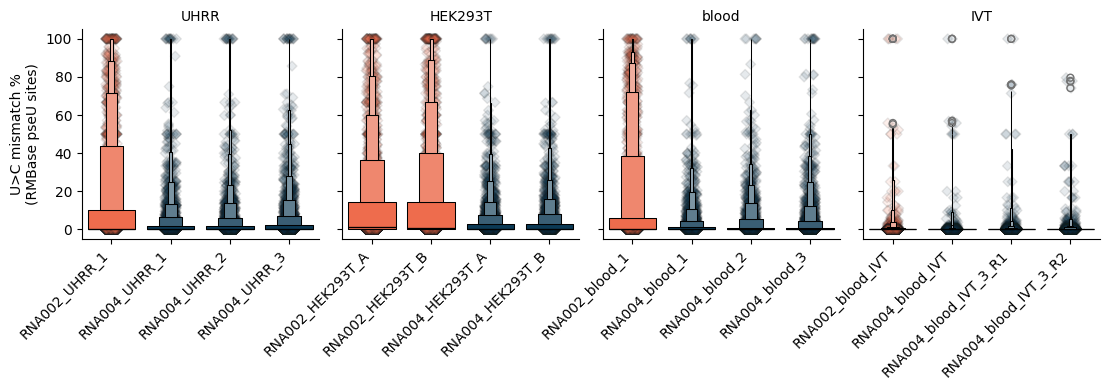

In [ ]:
# Create FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create FacetGrid with proper column wrapping
g = sns.FacetGrid(
    rmbase_tmp_complete,
    col="tissue_flat",
    col_wrap=4,
    sharex=False,
    sharey=True,
    col_order=["UHRR", "HEK293T", "blood", "IVT"],     height=4, 
    aspect=0.7,  
)

# Define plotting function for per-facet sorting
def plot_facet(data, color, **kwargs):
    # Sort samples within each facet
    order = sorted(data["sample_flat"].unique())
    palette = data.set_index("sample_flat")["flowcell_color"].to_dict()

    sns.stripplot(
        data=data,
        x="sample_flat", y="U>C %",
        order=order,
        jitter=True,
        alpha=0.1,
        marker="D",
        linewidth=1,
        palette=palette,
        zorder=0,
        **kwargs
    )
    sns.boxenplot(
        data=data,
        x="sample_flat", y="U>C %",
        order=order,
        linecolor="black",
        saturation=1,
        palette=palette,
        **kwargs
    )

# Apply facet-wise plotting
g.map_dataframe(plot_facet)

# Labeling and formatting
g.set_axis_labels("", "U>C mismatch %\n(RMBase pseU sites)")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
g.fig.subplots_adjust(wspace=0.1, hspace=0.3)

g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_pseu_sites_pertissue_sample.svg", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_pseu_sites_pertissue_sample.png", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_pseu_sites_pertissue_sample.pdf", bbox_inches='tight', transparent=True, dpi=300)

/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assign

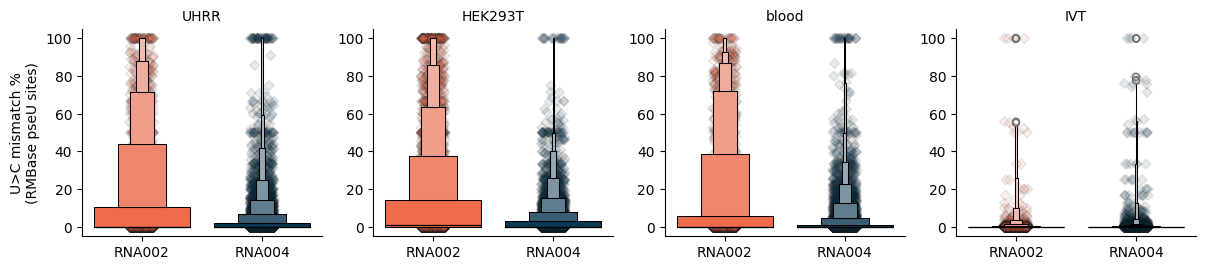

In [ ]:
# Create FacetGrid
g = sns.FacetGrid(
    rmbase_tmp_complete, col="tissue_flat", col_wrap=4, 
    sharex=False, sharey=False, col_order=["UHRR", "HEK293T", "blood", "IVT"] # Adjust plot size
)
g.map_dataframe(sns.stripplot,marker="D", linewidth=1, alpha=.1, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = rmbase_tmp_complete.set_index("chem_type")["flowcell_color"].to_dict(), zorder = 0)
g.map_dataframe(sns.boxenplot, x="chem_type", order = ["RNA002", "RNA004"], linecolor ="black", y="U>C %",saturation=1, palette = rmbase_tmp_complete.set_index("chem_type")["flowcell_color"].to_dict())
g.set_axis_labels("", "U>C mismatch %\n(RMBase pseU sites)")
g.set_titles("{col_name}")  

g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_sites_pertissue.svg", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_sites_pertissue.png", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_sites_pertissue.pdf", bbox_inches='tight', transparent=True, dpi=300)

/tmp/ipykernel_533141/3151969064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax = ax, data=rmbase_tmp_complete,marker="D", linewidth=1, alpha=.4, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = rmbase_tmp_complete.set_index("chem_type")["flowcell_color"].to_dict(),  zorder=0)


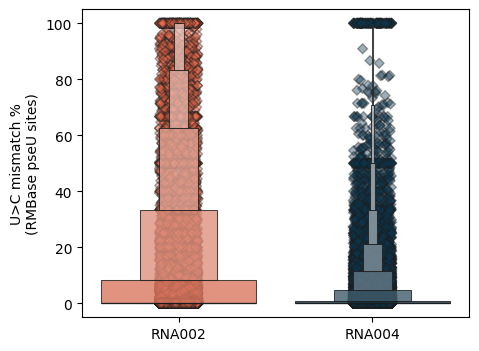

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(5, 4))
sns.stripplot(ax = ax, data=rmbase_tmp_complete,marker="D", linewidth=1, alpha=.4, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = rmbase_tmp_complete.set_index("chem_type")["flowcell_color"].to_dict(),  zorder=0)
sns.boxenplot(ax = ax,data=rmbase_tmp_complete, x="chem_type", y="U>C %", order = ["RNA002", "RNA004"], hue = "chem_type", palette = rmbase_tmp_complete.set_index("chem_type")["flowcell_color"].to_dict(), alpha = 0.8)
ax.set(xlabel = "", ylabel = "U>C mismatch %\n(RMBase pseU sites)")
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_Sites.svg", bbox_inches='tight', transparent=True, dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_Sites.png", bbox_inches='tight', transparent=True, dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_RMBase_Sites.pdf", bbox_inches='tight', transparent=True, dpi=300)



In [ ]:
p_complete["sample_flat"] = (
    p_complete["sample"]
    .str.replace("_A", "_HEK293T_A")
    .str.replace("_B", "_HEK293T_B")
    .str.replace("_basecall.0.7.2.GRCh38.bam", "")
    .str.replace("S5_DRS", "blood_2")
    .str.replace("blood.0.7.2", "blood_1")
    .str.replace("blood_IVT.0.7.2", "blood_IVT_1")
    .str.replace("S6_IVT_LI", "blood_IVT_3_R2")
    .str.replace("S6_IVT", "blood_IVT_3_R1")
    .str.replace("S6_DRS", "blood_3")
    .str.replace(".0.7.2", "")

    )
p_complete["tissue"] = p_complete["sample_flat"].str.replace("_[A|B|S|1|2|3].*$", "", regex=True)
p_complete["chem_type"] = p_complete["tissue"].str.replace("_.*$", "", regex=True)
p_complete["tissue_flat"] = p_complete["tissue"].str.replace(".*_", "", regex=True)
p_complete["U>C %"] = (p_complete["C_mismatch"] / p_complete["n_reads"]) * 100
p_complete["ID"] = p_complete["sample_flat"] + "_" + p_complete["chrom"] + "_" + p_complete["chromStart"].astype(str)
p_complete.set_index("ID", inplace = True)
custom_palette_rna00 = {"RNA002": "#ee6c4d", "RNA004": "#0b3954"}
p_complete["flowcell_color"] = [custom_palette_rna00[i] for i in p_complete.chem_type]

In [ ]:
p_complete.to_csv("/home/awiercze/NEW_RNA004_PLOTS/Tavakoli_pseu_sites_UC_mismatch.csv", index = False)

### PLOT

/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/awiercze/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assign

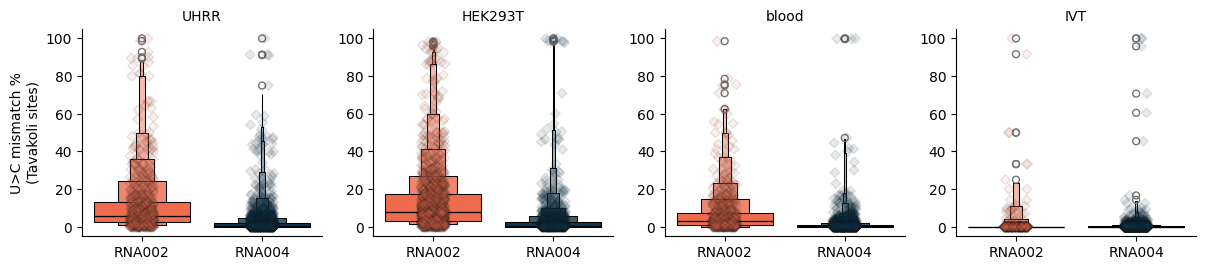

In [ ]:
# Create FacetGrid
g = sns.FacetGrid(
    p_complete, col="tissue_flat", col_wrap=4, 
    sharex=False, sharey=False, col_order=["UHRR", "HEK293T", "blood", "IVT"] # Adjust plot size
)
colors_input = {
"RNA002_HEK293T" :  "#0173b2",
"RNA002_blood" :"#cc78bc", 
"RNA002_blood_IVT" :"#029e73", 
"RNA002_UHRR" : "#d55e00", 
"RNA004_HEK293T" : "#56b4e9", 
"RNA004_blood" :"#ece133", 
"RNA004_blood_IVT" :"#fbafe4", 
"RNA004_UHRR" : "#de8f05",
"Illumina" : "#e9d8a6"}
g.map_dataframe(sns.stripplot,marker="D", linewidth=1, alpha=.1, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = p_complete.set_index("chem_type")["flowcell_color"].to_dict())
g.map_dataframe(sns.boxenplot, x="chem_type", order = ["RNA002", "RNA004"], linecolor ="black", y="U>C %",saturation=1, palette = p_complete.set_index("chem_type")["flowcell_color"].to_dict())
g.set_axis_labels("", "U>C mismatch %\n(Tavakoli sites)")
g.set_titles("{col_name}")  

g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_sites_pertissue.svg", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_sites_pertissue.png", bbox_inches='tight', transparent=True, dpi=300)
g.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_sites_pertissue.pdf", bbox_inches='tight', transparent=True, dpi=300)



/tmp/ipykernel_2172201/1190035412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax = ax, data=p_complete,marker="D", linewidth=1, alpha=.4, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = p_complete.set_index("chem_type")["flowcell_color"].to_dict(),  zorder=0)


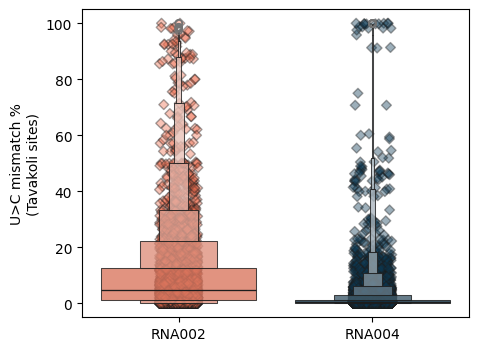

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(5, 4))
sns.stripplot(ax = ax, data=p_complete,marker="D", linewidth=1, alpha=.4, x="chem_type", order = ["RNA002", "RNA004"], y="U>C %",jitter=True,palette = p_complete.set_index("chem_type")["flowcell_color"].to_dict(),  zorder=0)
sns.boxenplot(ax = ax,data=p_complete, x="chem_type", y="U>C %", order = ["RNA002", "RNA004"], hue = "chem_type", palette = p_complete.set_index("chem_type")["flowcell_color"].to_dict(), alpha = 0.8)
ax.set(xlabel = "", ylabel = "U>C mismatch %\n(Tavakoli sites)")
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_Sites.svg", bbox_inches='tight', transparent=True, dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_Sites.png", bbox_inches='tight', transparent=True, dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE2/PAPER_UC_mismatch_global_tavakoli_Sites.pdf", bbox_inches='tight', transparent=True, dpi=300)

